In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [35]:
#import data
book=pd.read_csv("RecommenderBooks.csv",encoding = 'ISO-8859-1')
book

,User.ID,Book.Title,Book.Rating,Unnamed: 3
0,276726,Classical Mythology,5.0,NaN
1,276729,Clara Callan,3.0,NaN
2,276729,Decision in Normandy,6.0,NaN
3,276736,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN
4,276737,The Mummies of Urumchi,6.0,NaN
...,...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7.0,NaN
9996,162121,Cannibal In Manhattan,9.0,NaN
9997,162121,How to Flirt: A Practical Guide,7.0,NaN
9998,162121,Twilight,8.0,NaN


In [39]:
# Renaming the column
book = book.rename({'User.ID':'UserId','Book.Title':'Title','Book.Rating':'Rating'}, axis=1)
book

,UserId,Title,Rating,Unnamed: 3
0,276726,Classical Mythology,5.0,NaN
1,276729,Clara Callan,3.0,NaN
2,276729,Decision in Normandy,6.0,NaN
3,276736,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN
4,276737,The Mummies of Urumchi,6.0,NaN
...,...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7.0,NaN
9996,162121,Cannibal In Manhattan,9.0,NaN
9997,162121,How to Flirt: A Practical Guide,7.0,NaN
9998,162121,Twilight,8.0,NaN


In [40]:
# Number of UserId ,Title and Ratings
book.nunique()

UserId        2182
Title         9655
Rating          10
Unnamed: 3       1
dtype: int64

In [41]:
# Number of Ratings ad counts
book['Rating'].value_counts().sort_index()

1.0       42
2.0       63
3.0      143
4.0      236
5.0      990
6.0      900
7.0     2043
8.0     2252
9.0     1477
10.0    1692
Name: Rating, dtype: int64

<Axes: >

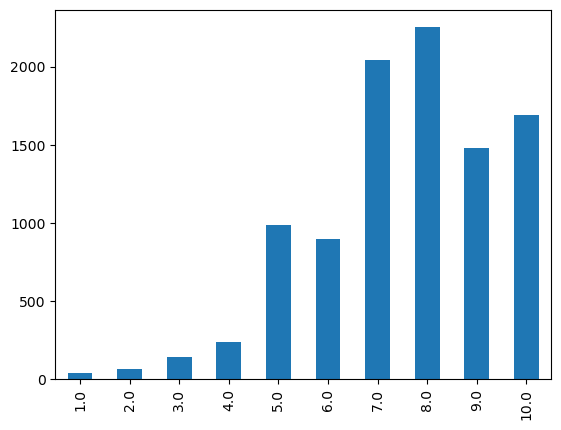

In [42]:
# Plotting the rating in the barplot
book['Rating'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Rating', ylabel='Density'>

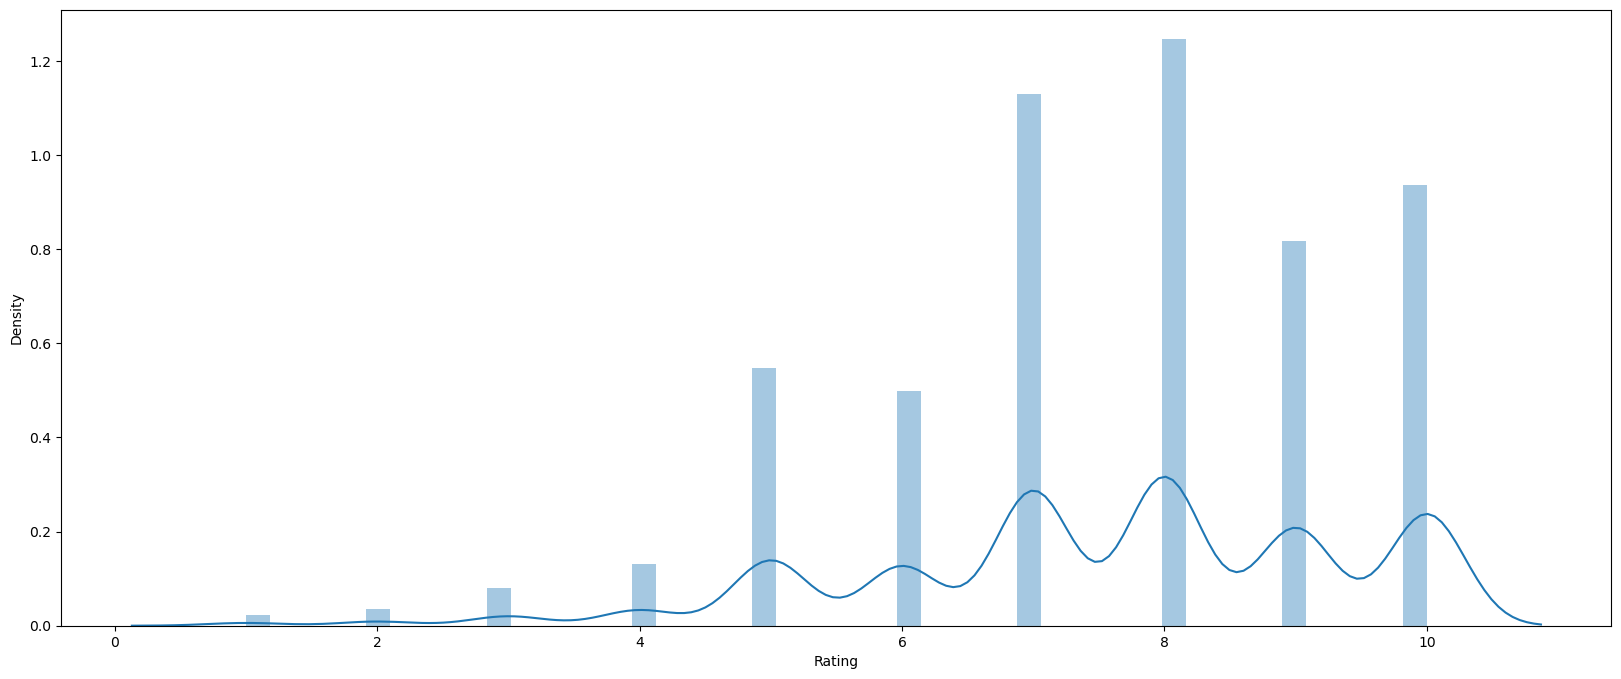

In [43]:
plt.figure(figsize=(20,8))
sns.distplot(book.Rating)

In [45]:
# Converting long data into wide data using pivot table
books2=book.pivot_table(index='UserId',columns='Title',values='Rating').reset_index(drop=True)
books2

Title,"Jason, Madison &amp",Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Impute those NaNs with 0 values
books2.fillna(0,inplace=True)
books2

Title,"Jason, Madison &amp",Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Calculating Cosine Similarity between Users on array data
user_sim=1-pairwise_distances(books2.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
# Store the results in a dataframe format
user_sim2=pd.DataFrame(user_sim)
user_sim2

,0,1,2,3,4,5,6,7,8,9,...,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Nullifying diagonal values
np.fill_diagonal(user_sim,0)
user_sim2

,0,1,2,3,4,5,6,7,8,9,...,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Most Similar Users
user_sim2.idxmax(axis=1)

0          0
1          0
2          0
3          0
4          0
        ... 
2145       0
2146       0
2147    1974
2148       0
2149       0
Length: 2150, dtype: int64

In [53]:
# extract the books which userId 276813 have watched
id1=books[book['UserId']==276813]
id1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
44,0,0,0,0,0,1,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,0
46,1,0,1,0,0,0,0,0,0,0,0
47,1,0,0,0,0,0,0,0,0,0,0
48,1,1,1,1,1,1,1,1,0,0,0
49,0,0,0,0,0,0,0,0,0,0,0
50,1,0,1,1,0,1,0,0,0,0,0


In [54]:
# extract the books which userId 8 have watched
id2=books[book['UserId']==8]
id2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence


In [56]:
# extract the books which userId 276813 & 8 have watched
book[(book['UserId']==276813) | (book['UserId']==8)]

,UserId,Title,Rating,Unnamed: 3
44,276813,Icebound,8.0,NaN
45,276813,I'll Be Seeing You,8.0,NaN
46,276813,From the Corner of His Eye,6.0,NaN
47,276813,Isle of Dogs,8.0,NaN
48,276813,Purity in Death,6.0,NaN
49,276813,This Year It Will Be Different: And Other Stories,6.0,NaN
50,276813,Proxies,8.0,NaN
2399,8,Ancient Celtic Romances,5.0,NaN
2400,8,The Western way: A practical guide to the West...,5.0,NaN
2401,8,Wings,5.0,NaN


In [58]:
# Extract the books which userId 162113 & 276736 have watched
book[(book['UserId']==162113) | (book['UserId']==276736)]

,UserId,Title,Rating,Unnamed: 3
3,276736,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN
9989,162113,The Cape Ann (Contemporary American Fiction),8.0,NaN


In [59]:
# Extract the books which userId 162113 & 162115 have watched
book[(book['UserId']==162113) | (book['UserId']==162115)]

,UserId,Title,Rating,Unnamed: 3
9989,162113,The Cape Ann (Contemporary American Fiction),8.0,NaN


In [62]:
def get_recommendation(customer_id):
        
        tem=list(user_sim2.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(books[books['UserId'].isin(tem)]['Title'])

        recommended_books = set(book_list)-set(books[books['UserId']==customer_id]['Title'])
        
        return recommended_books